In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./shopping_behavior.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.shape

(3900, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


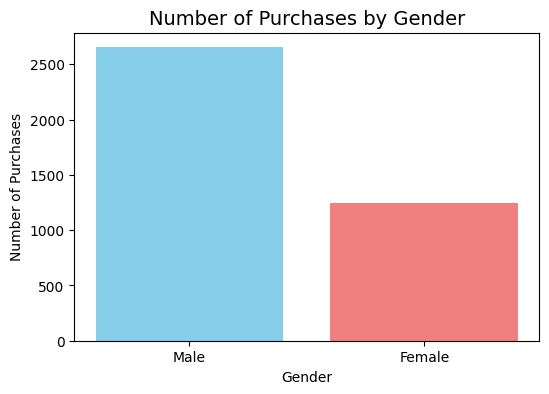

In [8]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])

plt.title("Number of Purchases by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Purchases")
plt.show()

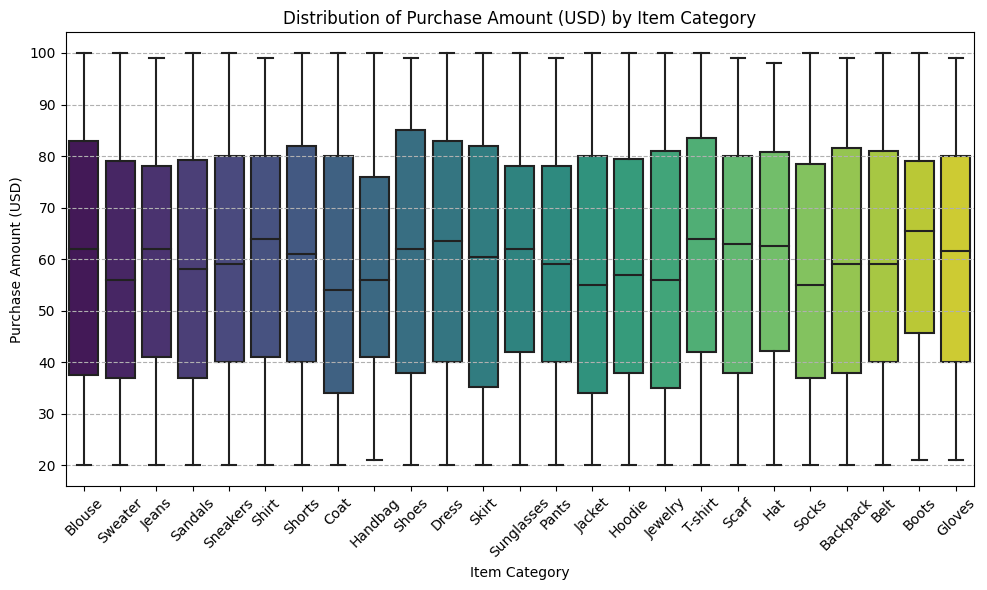

In [9]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Item Purchased',
    y='Purchase Amount (USD)',
    data=df,
    palette='viridis'
)

plt.title('Distribution of Purchase Amount (USD) by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

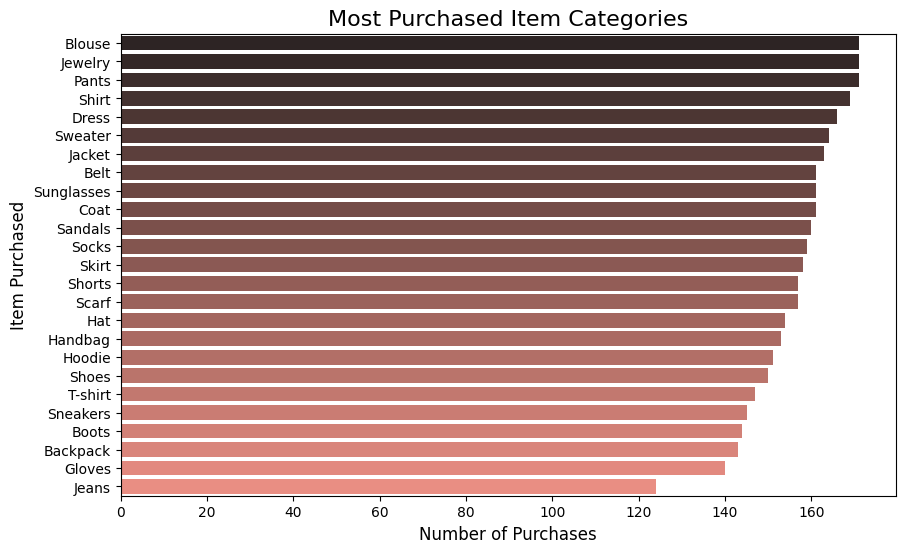

In [11]:
plt.figure(figsize=(10, 6))

order = df['Item Purchased'].value_counts().index

sns.countplot(
    data=df,
    y='Item Purchased',
    order=order,
    palette='dark:salmon'
)

plt.title('Most Purchased Item Categories', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Item Purchased', fontsize=12)
plt.show()

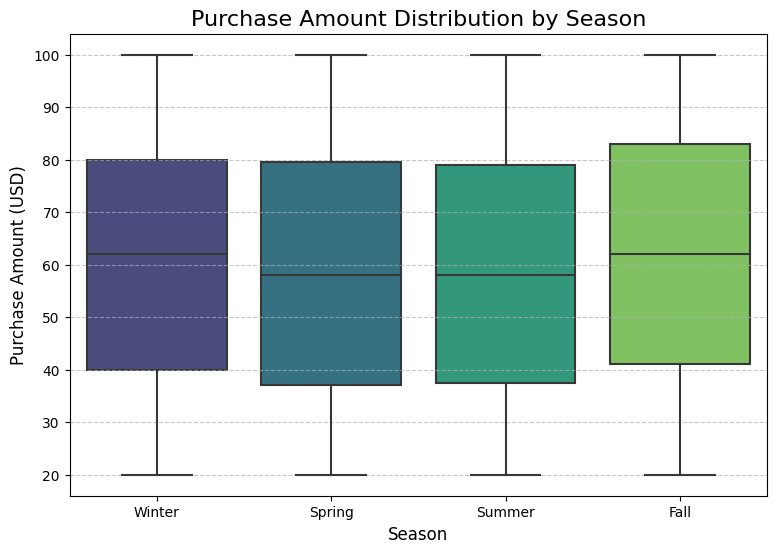

In [12]:
plt.figure(figsize=(9, 6))

sns.boxplot(
    x='Season',                    
    y='Purchase Amount (USD)',     
    data=df,
    palette='viridis'             
)

plt.title('Purchase Amount Distribution by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

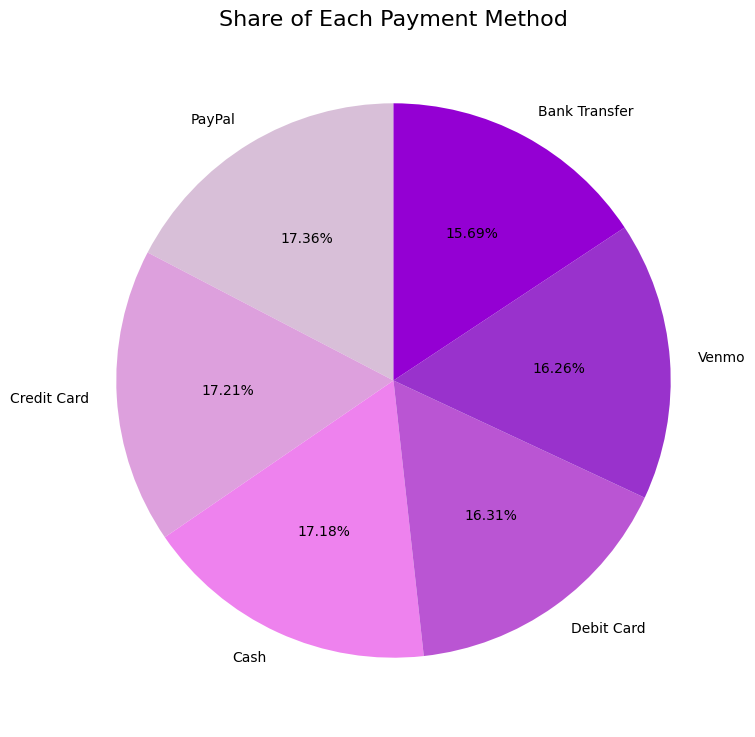

In [13]:
counts = df['Payment Method'].value_counts()

labels = counts.index
sizes = counts.values

plt.figure(figsize=(9, 9))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.02f%%',
    startangle=90,
    colors=['thistle','plum','violet','mediumorchid','darkorchid','darkviolet']
)

plt.title('Share of Each Payment Method', fontsize=16)
plt.show()

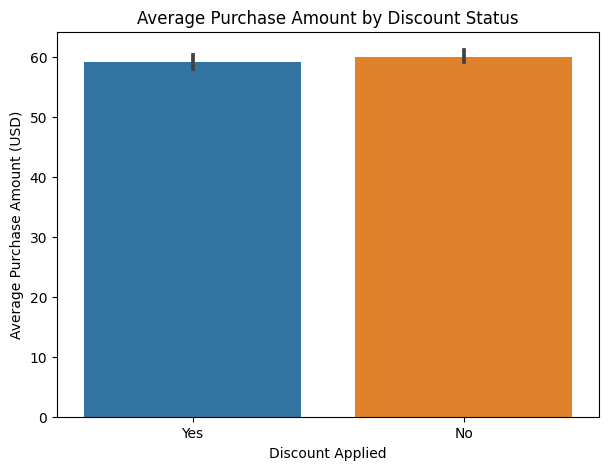

In [14]:
plt.figure(figsize=(7, 5))

sns.barplot(
    x='Discount Applied',
    y='Purchase Amount (USD)',
    data=df,
    palette=['#1f77b4', '#ff7f0e']
)

plt.title('Average Purchase Amount by Discount Status')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()